## Char Validation
First, validate if the dataset contains all possible characters for the four languages

In [1]:
%%time
import pickle

with open('four_languages_dataset.pickle', 'rb') as file:
    texts = pickle.load(file)

CPU times: user 3.31 s, sys: 3.87 s, total: 7.18 s
Wall time: 7.18 s


In [1]:
# Define the dataset path
dataset_path = 'four_languages_dataset.txt'

# Define the comprehensive character list as previously discussed
english_chars = set(chr(i) for i in range(65, 91)) | set(chr(i) for i in range(97, 123))  # A-Z, a-z
digits = set(chr(i) for i in range(48, 58))  # 0-9
common_punctuation = set("!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~")

# German specific characters
german_chars = set("äöüß")

# French specific characters
french_chars = set(['à','â','æ','ç','é','è','ê','ë','î','ï','ô','œ','ù','û','ü','ÿ','À','Â','Æ',
                    'Ç','É','È','Ê','Ë','Î','Ï','Ô','Œ','Ù','Û','Ü','Ÿ'])

# Python symbols 
python_symbols = set(":+-*/=<>{}[]()#,.?!@%^&|~")

more_symbols = set([' ','\n','\xa0','\t','’','–','“','»','«','„','É','ᵉ','á','—','À','Ü','í','ó',
                    'ō','Ö','°','Ä','ʳ','²','о','…','а','ā','ć','е','и','š','†','”','н',])

greek_chars = set(['α','β','γ','δ','ε','ζ','η','θ','ι','κ','λ','μ','ν','ξ','ο','π','ρ','σ','τ','υ','φ','χ',
               'ψ','ω','Α','Β','Γ','Δ','Ε','Ζ','Η','Θ','Ι','Κ','Λ','Μ','Ν','Ξ','Ο','Π','Ρ','Σ','Τ','Υ','Φ','Χ','Ψ','Ω'])

currency_symbols = set(['$','€','£','¥','₽','₱','₹','฿','₩','₺','₴','₦','₫','₵','₿',
                    '₣','₡','₮','₢','₼','₥','₠','₧','₸','₯','₶','₷','₻','₽','₿'])

# Combine all sets
comprehensive_char_list = english_chars | digits | common_punctuation | german_chars 
comprehensive_char_list = comprehensive_char_list | french_chars | python_symbols 

# Initialize a set to keep track of unique characters found in the dataset
found_chars = set()

# Function to process the dataset
def process_dataset(path, char_list):
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            found_chars.update(set(line))  # Update found characters with characters in the current line
            if char_list.issubset(found_chars):  # Check if all characters are found
                return True, char_list - found_chars  # Return True and the set of missing characters (should be empty)
    return False, char_list - found_chars  # Return False and the set of missing characters

# Process the dataset
all_chars_found, missing_chars = process_dataset(dataset_path, comprehensive_char_list)

# Print the results
if all_chars_found:
    print("All characters in the comprehensive character list have been found in the dataset.")
else:
    print("Not all characters were found. Missing characters:", missing_chars)


All characters in the comprehensive character list have been found in the dataset.


### Get extra chars

In [2]:
%%time
comprehensive_char_list = comprehensive_char_list | more_symbols | currency_symbols | greek_chars
def find_extra_chars_details_in_dataset(path, char_list):
    found_extra_chars = set()
    extra_chars_frequency = {}
    total_chars_count = 0  # Track the total number of characters in the dataset
    extra_chars_count = 0  # Track the total number of extra characters in the dataset
    
    try:
        with open(path, 'r', encoding='utf-8') as file:
            for line in file:
                total_chars_count += len(line)  # Update total characters count
                line_chars = set(line)
                extra_chars = line_chars - char_list  # Identify extra characters in the line
                
                found_extra_chars.update(extra_chars)  # Update the set of found extra characters
                
                # Update frequency and count of extra characters
                for char in extra_chars:
                    char_count_in_line = line.count(char)
                    extra_chars_count += char_count_in_line  # Update total extra characters count
                    extra_chars_frequency[char] = extra_chars_frequency.get(char, 0) + char_count_in_line
    
    except FileNotFoundError:
        print(f"File {path} not found.")
        return None, None, None
    
    # Calculate the percentage of the dataset that is composed of extra characters
    extra_chars_percentage = (extra_chars_count / total_chars_count) * 100 if total_chars_count > 0 else 0
    
    return found_extra_chars, extra_chars_frequency, extra_chars_percentage

found_extra_chars, extra_chars_frequency, extra_chars_percentage = find_extra_chars_details_in_dataset(dataset_path, comprehensive_char_list)

CPU times: user 2min 16s, sys: 2.11 s, total: 2min 18s
Wall time: 2min 18s


In [3]:
print("Percentage of extra characters in the dataset:", extra_chars_percentage)
extra_chars_sorted = sorted(extra_chars_frequency.items(), key=lambda x: x[1], reverse=True)
print("Number of unique extra characters:", len(extra_chars_sorted))
print("Sample of extra characters found in the dataset:", list(found_extra_chars)[:10])
print("Top 100 most frequent extra characters:", extra_chars_sorted[:100])

Percentage of extra characters in the dataset: 0.039217259286788375
Number of unique extra characters: 12518
Sample of extra characters found in the dataset: ['ụ', 'ኸ', 'ꦫ', '𝕆', '銃', '労', 'ヌ', '♤', '覺', 'Ḣ']
Top 100 most frequent extra characters: [('ł', 42845), ('‘', 39468), ('č', 36811), ('ñ', 35287), ('ū', 33781), ('ú', 29351), ('ã', 26559), ('₂', 26163), ('×', 25432), ('│', 25414), ('ø', 24844), ('р', 23512), ('ī', 22786), ('‚', 21966), ('³', 21659), ('ı', 20490), ('в', 19026), ('ă', 18699), ('с', 18228), ('к', 17003), ('ς', 16911), ('ž', 16580), ('л', 16273), ('å', 15877), ('ń', 15542), ('т', 15371), ('Š', 15273), ('−', 14834), ('ř', 14569), ('ᵒ', 14544), ('ş', 14389), ('¹', 14245), ('ý', 13263), ('ا', 13190), ('ș', 12709), ('′', 12387), ('\u2009', 12049), ('Á', 11811), ('§', 11043), ('ğ', 10988), ('ě', 10929), ('ð', 10901), ('ʿ', 9927), ('Č', 9917), ('д', 9845), ('ˈ', 9442), ('ś', 9079), ('ل', 8959), ('₃', 8633), ('₁', 8555), ('·', 8438), ('•', 8347), ('ò', 8295), ('м', 8143), (

## Using transformers tokenizer
We will retrain Mistral's tokenizer on our dataset

In [4]:
from transformers import AutoTokenizer
import requests
import os

# tokenizer2 = LlamaTokenizerFast.from_pretrained("hf-internal-testing/llama-tokenizer")
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-v0.1")

/root/Thesis/mkdd/mkdd_e/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
dataset_path = 'four_languages_dataset.txt'

# Check if the dataset exists
if not os.path.isfile(dataset_path):
    raise FileNotFoundError(f"Dataset file {dataset_path} not found.")

# Create an iterator to read the dataset
def dataset_iterator(batch_size=1000):
    with open(dataset_path, 'r', encoding='utf-8') as f:
        batch = []
        for line in f:
            # Optionally, you can append a special token to represent newlines instead of the newline character itself
            processed_line = line.rstrip() + '\n'  # Use rstrip to remove trailing whitespaces but keep newlines
            batch.append(processed_line)
            if len(batch) == batch_size:
                yield batch
                batch = []
        if batch:
            yield batch

In [6]:
%%time
# Train the tokenizer on your dataset
new_tokenizer = tokenizer.train_new_from_iterator(
    dataset_iterator(batch_size=1000),  # Using the iterator with a specified batch size
    vocab_size=32000  # Specify the desired new vocab size
)




CPU times: user 1d 23h 7min 51s, sys: 3h 43min 48s, total: 2d 2h 51min 39s
Wall time: 2h 27min 32s


In [7]:
# Save the newly trained tokenizer
new_tokenizer.save_pretrained("En_De_Fr_Py_Tokenizer")

('En_De_Fr_Py_Tokenizer/tokenizer_config.json',
 'En_De_Fr_Py_Tokenizer/special_tokens_map.json',
 'En_De_Fr_Py_Tokenizer/tokenizer.model',
 'En_De_Fr_Py_Tokenizer/added_tokens.json',
 'En_De_Fr_Py_Tokenizer/tokenizer.json')

In [8]:
# Encode the sample string
original_text = '''
def print_text(text):
    if text=='10':
        print(10)
    else:
        print('not 10')
'''
used_tokenizer = new_tokenizer
encoded_output = used_tokenizer.encode(original_text)

# Access the tokens and ids
tokens = used_tokenizer.tokenize(original_text)
token_ids = encoded_output

print("Original Text:", original_text)
print("Tokens:", tokens)
print("Token IDs:", token_ids)

# Decoded back
decoded_text = used_tokenizer.decode(token_ids)  

print("Decoded back:", decoded_text)

Original Text: 
def print_text(text):
    if text=='10':
        print(10)
    else:
        print('not 10')

Tokens: ['▁\n', 'def▁', 'print_', 'text', '(', 'text', '):\n', '▁▁▁▁', 'if▁', 'text', '==', "'", '10', "':\n", '▁▁▁▁▁▁▁▁', 'print(', '10)\n', '▁▁▁▁', 'else:\n', '▁▁▁▁▁▁▁▁', "print('", 'not▁', '10', "')\n"]
Token IDs: [1, 12827, 17572, 20807, 13938, 12, 13938, 12956, 12754, 12989, 13938, 13125, 11, 13613, 15394, 12764, 19601, 27281, 12754, 13846, 12764, 20620, 13114, 13613, 13382]


2024-03-08 01:26:57.483816: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-08 01:27:06.064104: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 01:27:12.776467: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Decoded back: <s> 
def print_text(text):
    if text=='10':
        print(10)
    else:
        print('not 10')



In [9]:
import pandas as pd
import time
from transformers import AutoTokenizer, LlamaTokenizerFast
import requests

# Define the English sentences and code snippets
en_sentences = ["This is a short sentence.", "The quick brown fox jumps over the lazy dog.", "I love to eat chocolate cake for dessert.", "She sells seashells by the seashore.", "The early bird catches the worm.", "Do you prefer coffee or tea?", "The movie was so good that I watched it twice.", "I try to exercise for thirty minutes every day.", "He is a great role model for young athletes.", "The Grand Canyon is a popular tourist destination."]
code_snippets = ["print('Hello, world!')", "for i in range(10):\n\tprint(i)", "def add_numbers(a, b):\n\treturn a + b", "x = [1, 2, 3, 4, 5]\ny = [6, 7, 8, 9, 10]\nz = x + y", "import numpy as np\nx = np.array([1, 2, 3])\ny = np.array([4, 5, 6])\nz = np.dot(x, y)", "class MyClass:\n\tdef __init__(self, name):\n\t\tself.name = name\n\tdef say_hello(self):\n\t\tprint('Hello, ' + self.name)", "try:\n\tx = 1 / 0\nexcept ZeroDivisionError:\n\tprint('Cannot divide by zero')", "with open('file.txt', 'r') as f:\n\tcontents = f.read()", "def fibonacci(n):\n\tif n <= 1:\n\t\treturn n\n\telse:\n\t\treturn fibonacci(n-1) + fibonacci(n-2)", "lambda x: x ** 2"]

# Define the tokenizers
mistral_tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-v0.1")
llama_tokenizer = LlamaTokenizerFast.from_pretrained("hf-internal-testing/llama-tokenizer")
my_tokenizer = new_tokenizer

# Define the languages
languages = ["English", "German", "French", "Python"]

# Create a list of tuples containing the language and corresponding text
texts = []
for i, text in enumerate(en_sentences):
    texts.append((languages[0], text))
    url = "https://translate.googleapis.com/translate_a/single"
    params = {"client": "gtx", "sl": "en", "tl": "de", "dt": "t", "q": text}
    response = requests.get(url, params=params).json()
    de_text = response[0][0][0]
    params = {"client": "gtx", "sl": "en", "tl": "fr", "dt": "t", "q": text}
    response = requests.get(url, params=params).json()
    fr_text = response[0][0][0]
    texts.append((languages[1], de_text))
    texts.append((languages[2], fr_text))

for text in code_snippets:
    texts.append((languages[3], text))

# Create an empty dataframe to store the results
results = pd.DataFrame(columns=["Tokenizer", "Language", "Num Tokens", "Time"])

# Loop over the texts
for current_name, current_tokenizer in [('mistral_tokenizer', mistral_tokenizer), ('llama_tokenizer', llama_tokenizer), ('my_tokenizer', my_tokenizer)]:
    for language, text in texts:
        start_time = time.time()
        tokens = current_tokenizer.encode(text, add_special_tokens=False)
        num_tokens = len(tokens)
        time_taken = time.time() - start_time

        # Store the results in the dataframe
        new_row = pd.DataFrame({"Tokenizer": [current_name], "Language": [language], "Num Tokens": [num_tokens], "Time": [time_taken]})
        results = pd.concat([results, new_row], ignore_index=True)

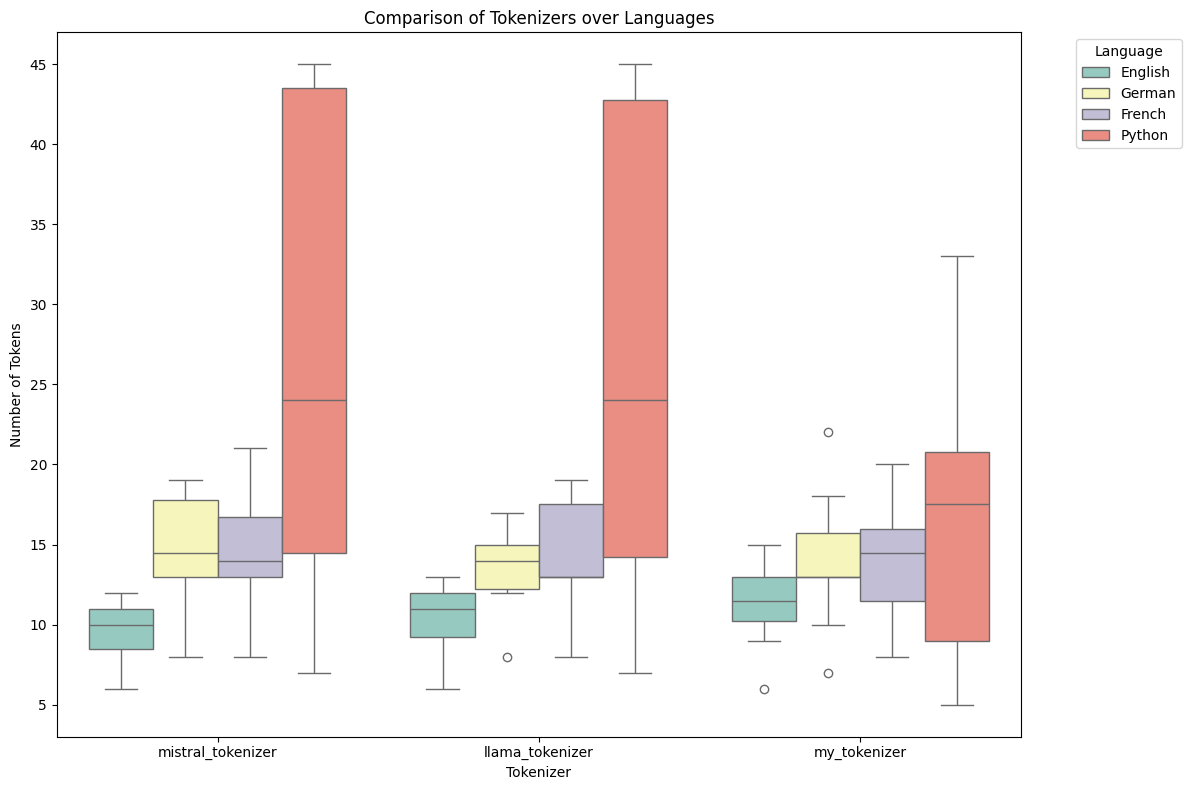

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter the DataFrame to include only the rows with the specified tokenizers
filtered_results = results[results['Tokenizer'].isin(['mistral_tokenizer', 'llama_tokenizer', 'my_tokenizer'])]

# Plotting
plt.figure(figsize=(12, 8))  # Adjust the size as necessary
sns.boxplot(x='Tokenizer', y='Num Tokens', hue='Language', data=filtered_results, palette="Set3")

plt.title('Comparison of Tokenizers over Languages')
plt.xlabel('Tokenizer')
plt.ylabel('Number of Tokens')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position to avoid overlap

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


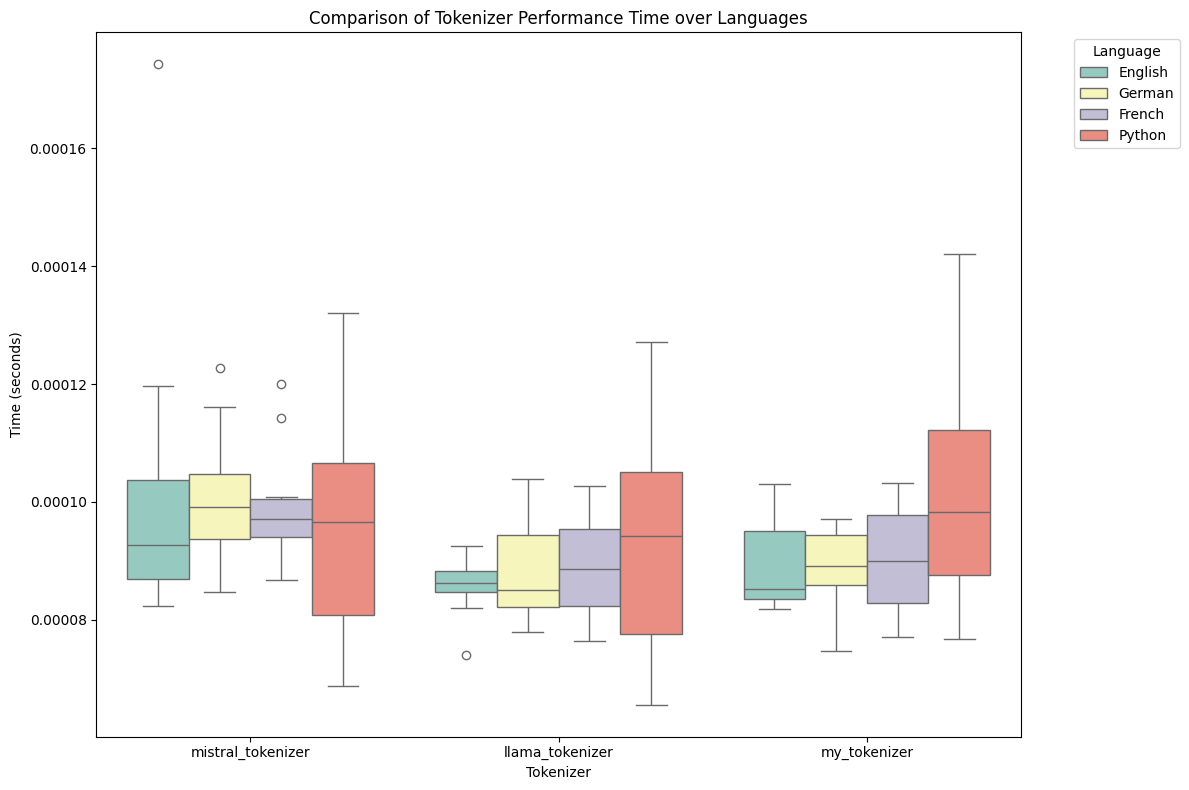

In [11]:
# Filter the DataFrame to include only the rows with the specified tokenizers
filtered_results = results[results['Tokenizer'].isin(['mistral_tokenizer', 'llama_tokenizer', 'my_tokenizer'])]

# Plotting
plt.figure(figsize=(12, 8))  # Adjust the size as necessary
sns.boxplot(x='Tokenizer', y='Time', hue='Language', data=filtered_results, palette="Set3")

plt.title('Comparison of Tokenizer Performance Time over Languages')
plt.xlabel('Tokenizer')
plt.ylabel('Time (seconds)')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position to avoid overlap

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()